In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(y, x):
    gamma = 0.86998
    return np.array([y[1], -(gamma**2/2*x*y[1]+3*y[0]**2*y[1]**2)/y[0]**3])

def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [11]:
# x = np.linspace(0,1,200)
N = 100
xi = np.cos(np.pi / (N+1) * (np.arange(1, N + 2) - 0.5)).astype(np.float64)
xi[0], xi[-1] = 1, -1
xi = xi[::-1] * 0.5 + 0.5
# xi = 0.5 * (xi[1:] + xi[:-1])
# xi = xi[1:-1]

# alpha = -0.308 #when gamma == 1
# alpha = -0.01
# alpha = -0.28969
alpha = -0.2
y0 = np.array([1, alpha])
solution = rk4(func, y0, xi)

T = 0.7

eps = 1
c = 0
while eps > 10**(-6):
    F = solution[-1,0] - T
    y1 = np.array([1, alpha + 10**(-6)])
    solution_1 = rk4(func, y1, xi)
    derF = ((solution_1[-1,0] - T) - F)/10**(-6)
    alpha = alpha - F/derF
    y = np.array([1, alpha])
    solution = rk4(func, y, xi)
    c += 1
    eps = np.abs(solution[-1, 0] - T)
print(solution[-1, 0], c, eps)

0.7000000000028948 3 2.894795514407633e-12


0.36814623165925253

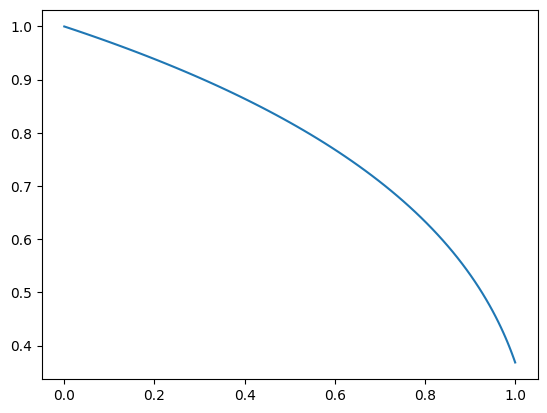

In [100]:
plt.plot(xi,solution[:,0])
# plt.plot(solution[:,1])
solution[-1,0]

In [102]:
def func(y, x):
    gamma = 0.86998
    return np.array([y[1], -(gamma**2/2*x*y[1]+3*y[0]**2*y[1]**2)/y[0]**3])

def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def get_init_solution(x, T):
    alphas = np.linspace(-0.28969, -0.01, 1000)
    for alpha in alphas:
        y0 = np.array([1, alpha])
        solution = rk4(func, y0, x)
        if np.abs(solution[-1,0] - T) < 10**(-3):
            break
    return solution[:,0]

N = 50

xi = np.cos(np.pi / (N+1) * (np.arange(1, N + 2) - 0.5)).astype(np.float64)
xi[0], xi[-1] = 1, -1
xi = xi[::-1] * 0.5 + 0.5
# xi = 0.5 * (xi[1:] + xi[:-1])
sgnB = 1
T = 0.4

W0 = get_init_solution(xi, T)[1:-1]
xi = xi[1:-1]

0.36814623165925253

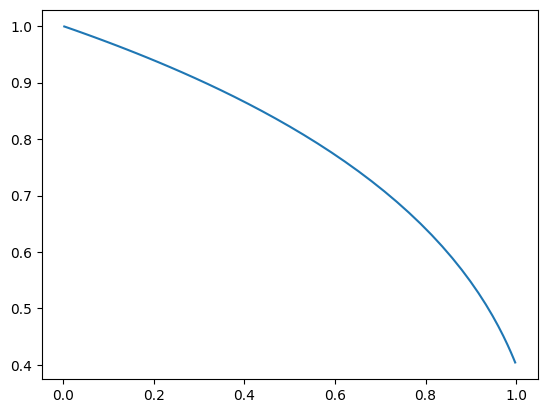

In [105]:
plt.plot(xi,W0)
# plt.plot(solution[:,1])
solution[-1,0]